In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_excel('telcom_data.xlsx')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [4]:
df.shape

(150001, 55)

In [5]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

# Handling The Missing Values

In [6]:
# What is the % of the missing values in the dataset

def percent_missing(df):

  # calculate total number of cells in the dataframe
  totalCells = np.product(df.shape)

  #count the number of missing values per column
  missingCount = df.isnull().sum()

  #calculate the total number of missing valies
  totalMissing = missingCount.sum()

  # calculate the percentage of the missing values
  print(" Telcom Data ", round(((totalMissing/totalCells) * 100), 2), "%", "Missing Values.")

percent_missing(df)

 Telcom Data  12.49 % Missing Values.


In [7]:
# The missing values in each column
df.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [8]:
# Dropping columns with more than 30% of missing values
df1 = df.drop(['Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 37500B < Vol UL',
                    'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 1250B < Vol UL < 6250B',
                   'Nb of sec with 125000B < Vol DL','HTTP UL (Bytes)','HTTP DL (Bytes)',
                   'TCP UL Retrans. Vol (Bytes)','TCP DL Retrans. Vol (Bytes)','Avg RTT UL (ms)','Avg RTT DL (ms)',
               'Last Location Name'], axis=1)
df1.shape

(150001, 42)

In [9]:
# Filling missing calues ith ffill method for columns

def fix_missing_ffill(df1, col):
  df1[col] = df1[col].fillna(method = 'ffill')
  return df1[col]

In [10]:
df1['Handset Manufacturer'] = fix_missing_ffill(df1, 'Handset Manufacturer')
df1['Handset Type'] = fix_missing_ffill(df1, 'Handset Type')
df1['Nb of sec with Vol DL < 6250B'] = fix_missing_ffill(df1, 'Nb of sec with Vol DL < 6250B')
df1['Nb of sec with Vol UL < 1250B'] = fix_missing_ffill(df1, 'Nb of sec with Vol UL < 1250B')

In [11]:
# Filling missing values with mean
df1 = df1.fillna(value=df1.mean())

In [12]:
df1.isnull().sum()

Bearer Id                         0
Start                             1
Start ms                          0
End                               1
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250B     0
Social Media DL (Bytes)           0
Social Media UL (Bytes)     

# User Engagement Analysis

## Sessions frequency 

In [13]:
# Calculate sessions frequency per user
sessions_frequency = df1['Bearer Id'].value_counts()

# Display the result
print("Sessions Frequency:")
print(sessions_frequency)

Sessions Frequency:
                        991
13042425979269199872     16
13042425965944199168     10
13042425974582800384      9
13042425978774599680      9
                       ... 
7349883253835950080       1
13114483558765600768      1
7349883253834980352       1
7349883253834300416       1
13114483460844900352      1
Name: Bearer Id, Length: 134709, dtype: int64


## The duration of the session 

In [14]:
from datetime import datetime

# Convert time columns to datetime objects
df1['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate The duration of the session
session_duration = (df1['End'] - df['Start']).dt.total_seconds()

# Display the result
print("The duration of the session:")
print(session_duration)

The duration of the session:
0         1823653.0
1         1365104.0
2         1361762.0
3         1321510.0
4         1089009.0
            ...    
149996      81231.0
149997      97971.0
149998      98249.0
149999      97911.0
150000          NaN
Length: 150001, dtype: float64


## The session total traffic (download and upload (bytes))

In [15]:
# Calculate session total traffic
session_total_traffic = df1['Total DL (Bytes)'] + df1['Total UL (Bytes)']

# Display the result
print("Session Total Triffic:")
print(session_total_traffic)

Session Total Triffic:
0         3.456294e+08
1         7.071854e+08
2         3.076910e+08
3         8.893527e+08
4         6.076814e+08
              ...     
149996    6.318041e+08
149997    7.057839e+08
149998    6.276986e+08
149999    4.015220e+08
150000    4.957646e+08
Length: 150001, dtype: float64


### Task 2.1 - Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

In [16]:
# Adding metrics columns to dataset
df1['session_duration'] = (df1['End'] - df['Start']).dt.total_seconds()
df1['session_total_traffic'] = df1['Total DL (Bytes)'] + df1['Total UL (Bytes)']

# Aggregate metrics per customer
agg_df1 = df1.groupby( 'MSISDN/Number').agg({
    'session_duration': 'sum',
    'session_total_traffic': 'sum'})

# Report the top 10 customers per engagement metric
top10_per_sd = agg_df1.sort_values(by = 'session_duration', ascending=False).head(10)
top10_per_stt = agg_df1.sort_values(by = 'session_total_traffic', ascending=False).head(10)


print("Top 10 customers per session_duration:")
print(top10_per_sd)

print("\nTop 10 customers per session_total_traffic:")
print(top10_per_stt)

Top 10 customers per session_duration:
               session_duration  session_total_traffic
MSISDN/Number                                         
4.188282e+10         72446911.0           5.317447e+11
3.362578e+10         18553769.0           8.499621e+09
3.361489e+10          9966899.0           8.846226e+09
3.376054e+10          9279444.0           8.514774e+09
3.362632e+10          8791942.0           7.971167e+09
3.366716e+10          8744914.0           5.618394e+09
3.366284e+10          6614275.0           4.000098e+09
3.366469e+10          6288734.0           5.682007e+09
3.360313e+10          6287767.0           4.976195e+09
3.366746e+10          5649883.0           2.600522e+09

Top 10 customers per session_total_traffic:
               session_duration  session_total_traffic
MSISDN/Number                                         
4.188282e+10         72446911.0           5.317447e+11
3.361489e+10          9966899.0           8.846226e+09
3.376054e+10          9279444.0     

### Task 2.2 - Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement

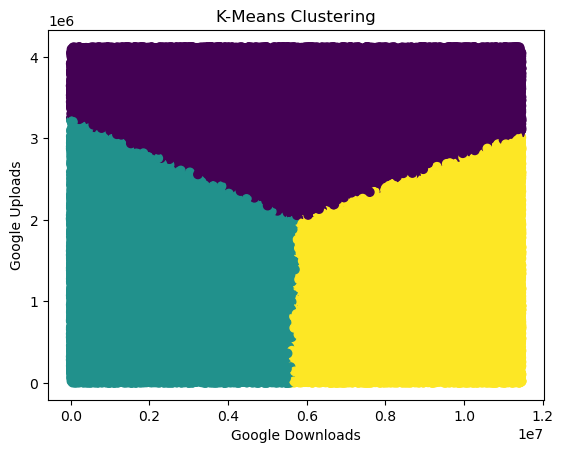

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Clustering
clustering = df1[['Google DL (Bytes)', 'Google UL (Bytes)']]

# Normalizer
scaler = StandardScaler()
normalizer = scaler.fit_transform(clustering)

# K-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df1['Cluster'] = kmeans.fit_predict(normalizer)

# Plot the clusters
plt.scatter(df1['Google DL (Bytes)'], df1['Google UL (Bytes)'], c=df1['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Google Downloads')
plt.ylabel('Google Uploads')
plt.show()

In [18]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
1392,243.926054
268,16.776789
1275,182.371956
528,122.544324
21,15.649817


In [19]:
original_data[0].min(), original_data[0].max()

(0.020424768246439347, 1650.9766070653359)

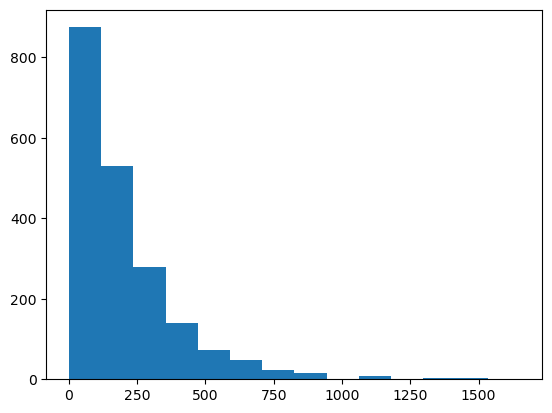

In [20]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

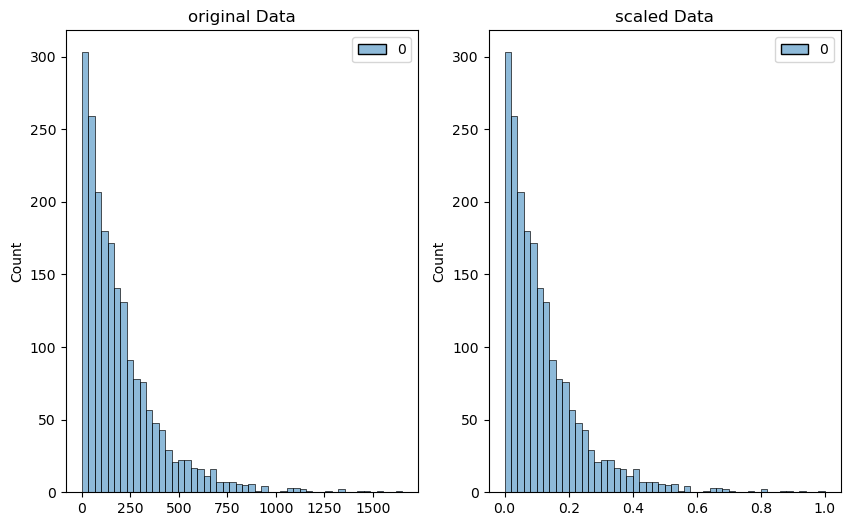

In [21]:
# min-max scale the data beteen 0 and 1

def scaler(df1):
  scaled_data = minmax_scaler.fit_transform(df1)

  #plot both together to compare
  fig, ax = plt.subplots(1,2, figsize = (10,6))
  sns.histplot(original_data, ax=ax[0])
  ax[0].set_title("original Data")
  sns.histplot(scaled_data, ax=ax[1])
  ax[1].set_title("scaled Data")

scaler(original_data)

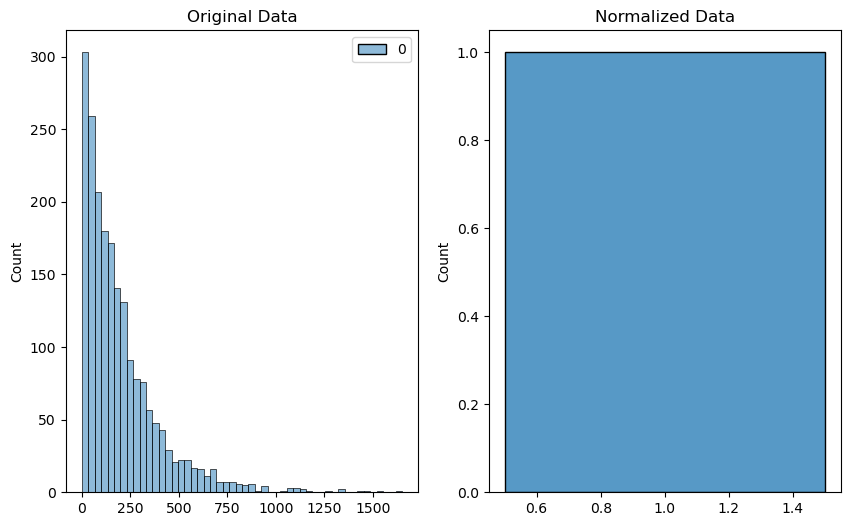

In [22]:
from sklearn.preprocessing import Normalizer

def normalizer(df1):
  norm = Normalizer()
  # normalize the exponetial data ith boxcox
  normalized_data = norm.fit_transform(df1)

  #Plot both for comparison
  fig, ax=plt.subplots(1,2, figsize = (10,6))
  sns.histplot(df1, ax = ax[0])
  ax[0].set_title('Original Data')
  sns.histplot(normalized_data[0], ax = ax[1])
  ax[1].set_title('Normalized Data')

normalizer(original_data)

# Feature Engineeringh 

In [23]:
df1['Google'] = df1['Google DL (Bytes)'] + df1['Google UL (Bytes)']
df1['Social Media'] = df1['Social Media DL (Bytes)'] + df1[ 'Social Media UL (Bytes)']
df1['Email'] = df1['Email DL (Bytes)'] + df1['Email UL (Bytes)']
df1['Youtube'] = df1['Youtube DL (Bytes)'] + df1['Youtube UL (Bytes)']
df1['Netflix'] = df1['Netflix DL (Bytes)'] + df1['Netflix UL (Bytes)']
df1['Gaming'] = df1['Gaming DL (Bytes)'] + df1[ 'Gaming UL (Bytes)']
df1['Other'] = df1['Other DL (Bytes)'] + df1['Other UL (Bytes)']
df1['Total'] = df1['Total DL (Bytes)'] + df1['Total UL (Bytes)']

In [24]:
df2 = df1.drop(['Google DL (Bytes)','Google UL (Bytes)','Social Media DL (Bytes)','Social Media UL (Bytes)','Email DL (Bytes)',
               'Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)',
                              'Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total DL (Bytes)','Total UL (Bytes)'], axis=1)
df2.shape

(150001, 37)

### Task 2.3 - Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings

In [25]:
# Compute metrics for each cluster
cluster_metrics = df2.groupby('Cluster').agg({
    'Google': ['min', 'max', 'mean', 'sum'],
    'Social Media': ['min', 'max', 'mean', 'sum'],
    'Email': ['min', 'max', 'mean', 'sum'],
    'Youtube': ['min', 'max', 'mean', 'sum'],
    'Netflix': ['min', 'max', 'mean', 'sum'],
    'Gaming': ['min', 'max', 'mean', 'sum'],
    'Other': ['min', 'max', 'mean', 'sum'],
    'Total': ['min', 'max', 'mean', 'sum']
}).reset_index()

# Display the result
print("Cluster Metrics:")
print(cluster_metrics)

Cluster Metrics:
  Cluster     Google                                         Social Media  \
                 min         max          mean           sum          min   
0       0  3254069.0  15528782.0  9.170009e+06  5.149327e+11       3111.0   
1       1    40330.0   7749507.0  3.961365e+06  1.871864e+11       1563.0   
2       2  5595781.0  14472972.0  1.006531e+07  4.689829e+11       2050.0   

                                            Email  ...        Gaming  \
         max          mean           sum      min  ...          mean   
0  3650861.0  1.828435e+06  1.026739e+11   8359.0  ...  4.310683e+08   
1  3650240.0  1.824741e+06  8.622448e+10  13925.0  ...  4.290666e+08   
2  3648814.0  1.831586e+06  8.534093e+10  25874.0  ...  4.307315e+08   

                    Other                                           \
            sum       min          max          mean           sum   
0  2.420621e+13  511769.0  859485577.0  4.297036e+08  2.412957e+13   
1  2.027468e+13  930148.0 

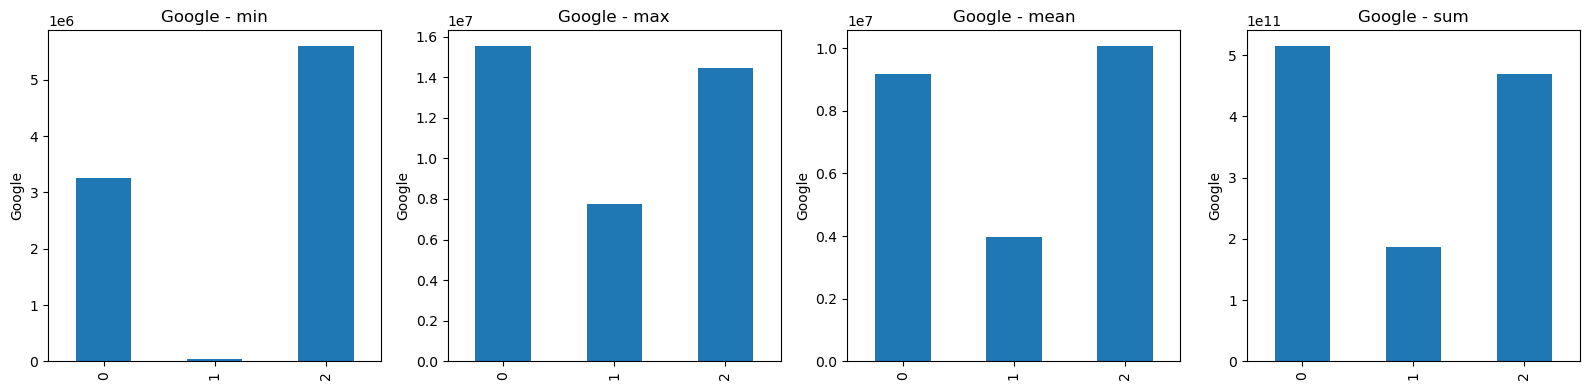

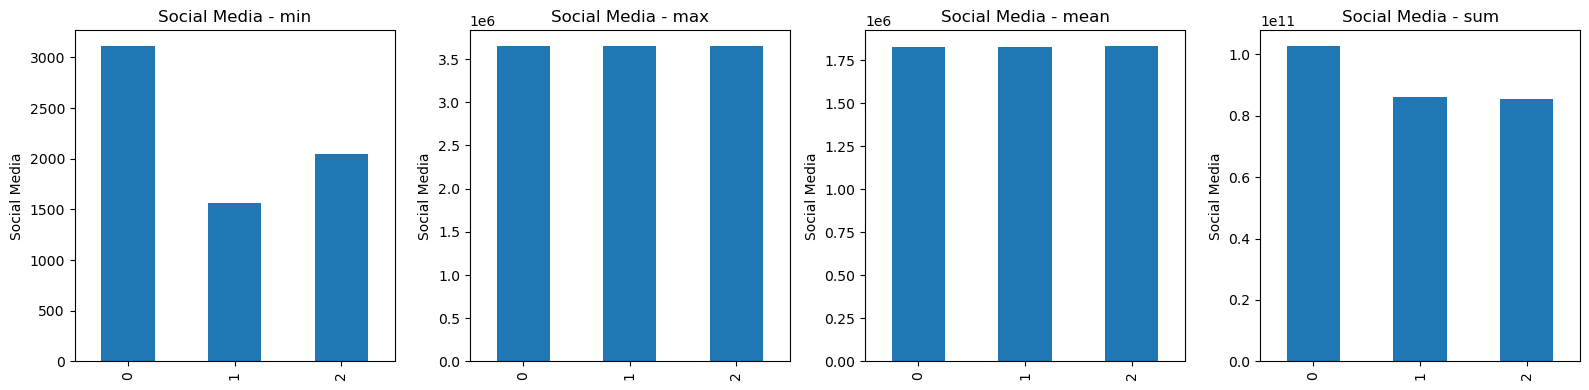

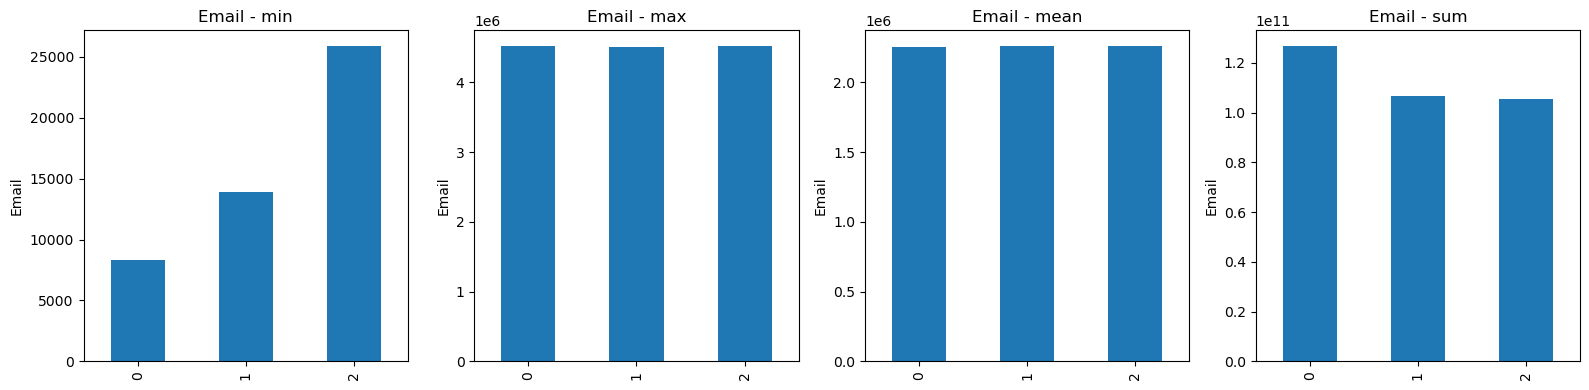

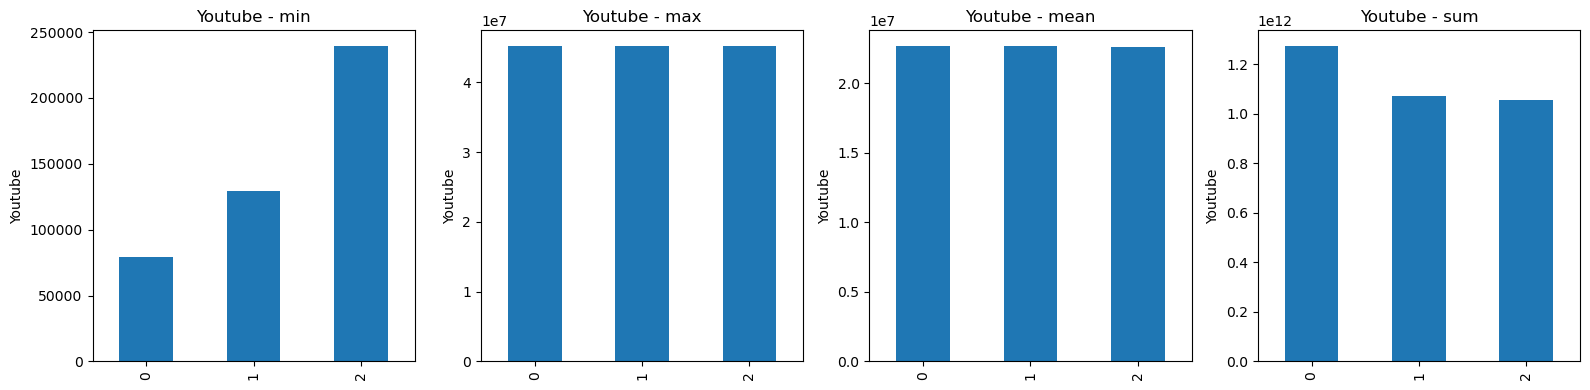

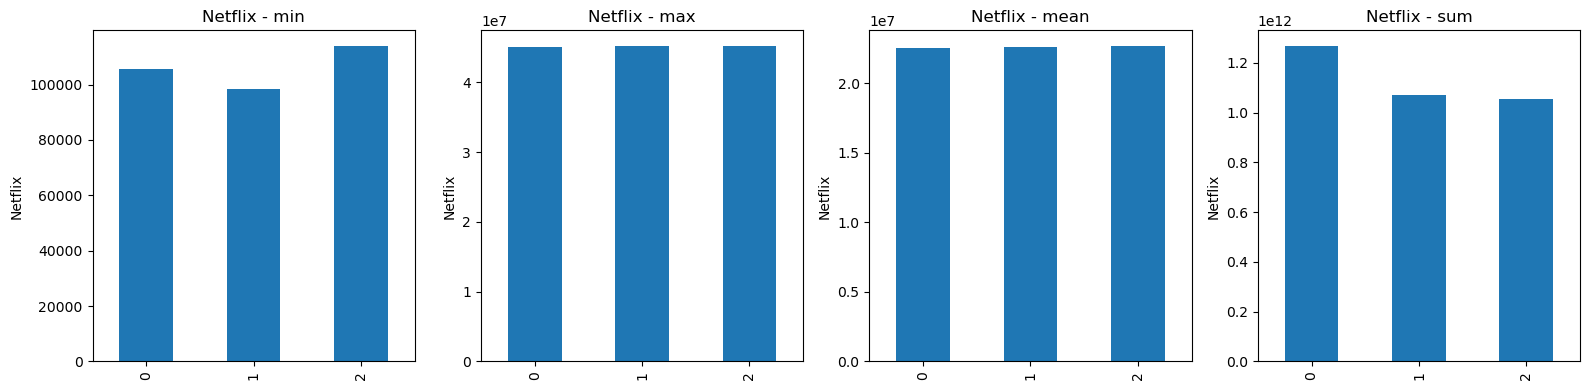

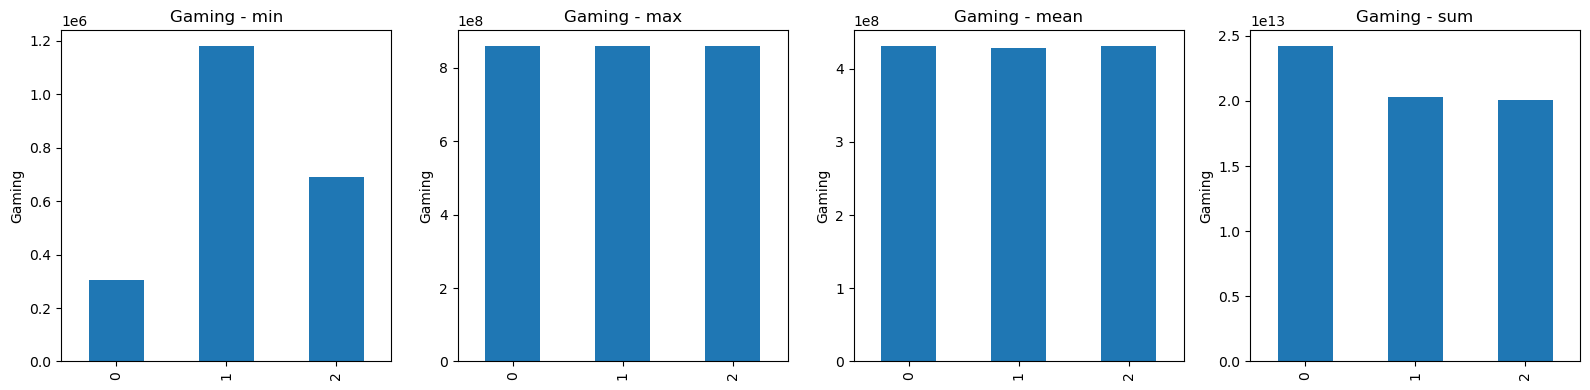

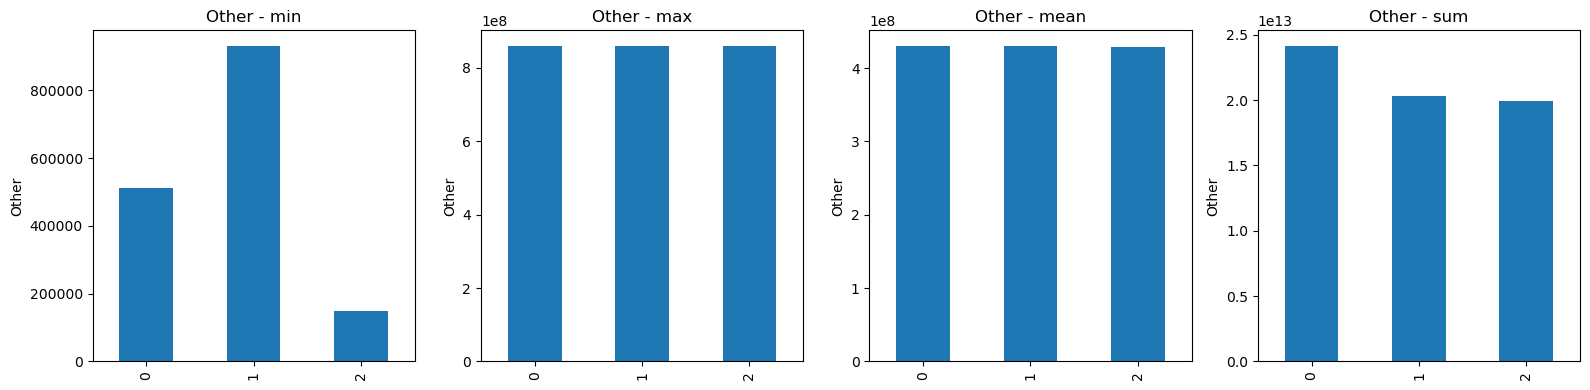

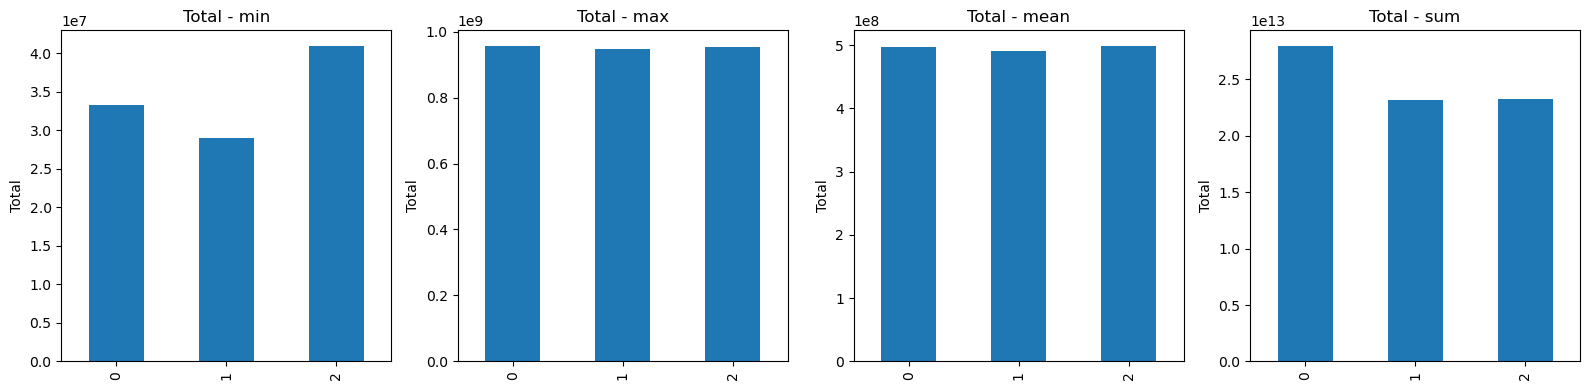

In [26]:
# Visualized results
for metric in ['Google','Social Media','Email','Youtube','Netflix','Gaming','Other','Total']:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

    for i, stat in enumerate(['min', 'max', 'mean', 'sum']):
        cluster_metrics[metric, stat].plot(kind='bar', ax=axes[i], title=f'{metric} - {stat}')
        axes[i].set_ylabel(metric)

    plt.tight_layout()
    plt.show()

### Task 2.4 - Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [27]:
# Aggregate total traffic per application and user
total_traffic_per_user_app = df2.groupby(['Bearer Id','MSISDN/Number','Handset Manufacturer','Handset Type'])['session_total_traffic'].sum().reset_index()

# Derive the top 10 most engaged users per application
top10_users_per_app = total_traffic_per_user_app.groupby('Handset Manufacturer').apply(lambda x: x.nlargest(10, 'session_total_traffic')).reset_index(drop=True)

# Display the result
print("Top 10 most engaged users per application:")
print(top10_users_per_app)

Top 10 most engaged users per application:
                Bearer Id  MSISDN/Number  \
0     6917537685937590272   3.366728e+10   
1     6917537694468679680   3.364106e+10   
2    13042425959482800128   3.377002e+10   
3     7277825656112820224   3.367679e+10   
4    13042425959419400192   3.365960e+10   
..                    ...            ...   
839  12682138000968900608   3.362287e+10   
840  13114483574133899264   3.376185e+10   
841  13042425957558999040   3.366627e+10   
842   7277825653641249792   3.362959e+10   
843  13042425958908299264   3.364125e+10   

                        Handset Manufacturer  \
0    A-Link Telecom International Co Limited   
1    A-Link Telecom International Co Limited   
2    A-Link Telecom International Co Limited   
3    A-Link Telecom International Co Limited   
4    A-Link Telecom International Co Limited   
..                                       ...   
839                                undefined   
840                                undefined

### Task 2.5 - Plot the top 3 most used applications using appropriate charts 

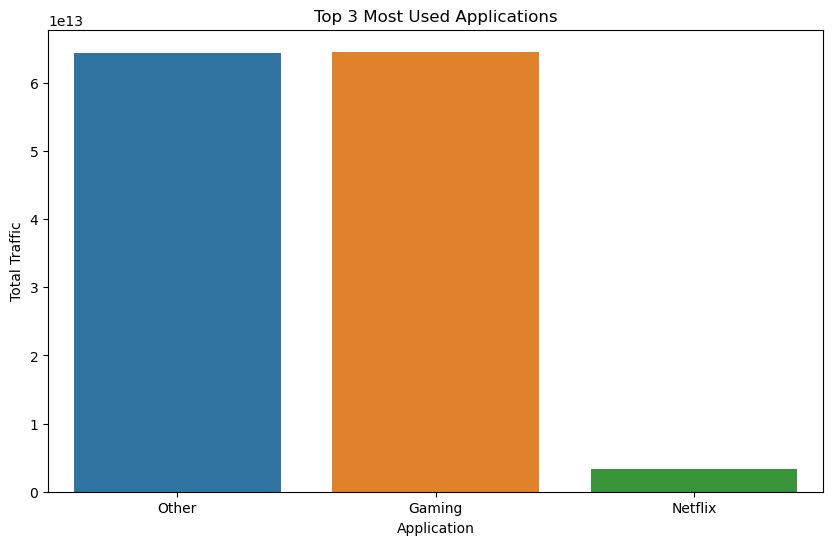

In [28]:
# Calculate the total traffic for each application
app_traffic = df2.sum().loc[['Other', 'Gaming', 'Netflix']]

# Plot the top 3 most used applications
plt.figure(figsize=(10, 6))
sns.barplot(x=app_traffic.index, y=app_traffic.values)
plt.xlabel('Application')
plt.ylabel('Total Traffic')
plt.title('Top 3 Most Used Applications')
plt.show()

### Task 2.6 - Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics
#### Task 2.6.1 - What is the optimized value of k (use the elbow method for this)  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Normalize each engagement metric
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(agg_df1)

# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)

# Using the elbow method to find the optimized value of k
sse = {}
kmax = 10

for k in range(1, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(normalized_data)
    sse[k] = kmeans.inertia_

    
# Plot the SSE for different values of k
plt.plot(list(sse.keys()), list(sse.values()),marker='*')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

#### Task 2.6.2 - Interpret your findings

The optimized value of k can be identified by observing the "elbow" or "knee" point in the SSE plot. The elbow point represents the value of k where the reduction in SSE starts to diminish significantly. This point indicates the optimal balance between the number of clusters and the within-cluster variability.

From the SSE plot, you should look for the point where the SSE starts to flatten out or form an elbow-like shape. This indicates that adding more clusters beyond that point does not significantly reduce the SSE.

Once you have identified the elbow point, the corresponding value of k can be considered as the optimized number of clusters for your engagement analysis.

Please note that the SSE plot is subjective, and the interpretation may vary based on the specific dataset and context. It's recommended to consider domain knowledge and other evaluation metrics, such as silhouette score, for a more comprehensive analysis.